# PageRank
### Celia y Nicolás

En este Notebook se desarrolla el algoritmo Page Rank.



## Web (gráfica de las páginas)

Definimos la matriz de adyacencia de las páginas web

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#Definimos la matriz de adyacencia
A = np.array([[0, 1, 0],
              [1, 0, 1],
              [0, 1, 0]])

### Matriz de transición

En el siguiente bloque de código obtenemos la matriz de transición a partir de la matriz de adyacencia

In [3]:
#Función que calcula la matriz de transición a partir de la matriz de adyacencia
def m_trans(A, d = 0.15):
    '''
    La función recibe 2 argumentos: 
    A es la matriz de adyacencia de la red (i.e., una matriz cuadrada de NxN. Cada entrada debe ser o bien 0 o bien 1)
    d es el factor de amortiguamiento considerado para el cálculo del PageRank
    
    Regresa P, una matriz estocástica de la misma dimensión que la matriz A obtenida según el algoritmo de nuestro documento
    '''
    N = A.shape[0] #Encuentra la dimensión de la matriz. Usa la primera entrada dado que es cuadrada
    P = np.zeros((N,N)) #Matriz de 0 de dimensión NxN que será rellenada con base en el algoritmo
    for i in range(A.shape[0]): #Para cada fila de la matriz de adyacencia
        k = list(A[i,:]).count(1) #Contamos el número de números 1 en la fial
        if k > 0: #Si tenemos más de un número 1
            P[i, :] = A[i,:]/k #Dividimos la fila por la cantidad de 1's en ella
        else: #Si no tenemos unos
            P[i, :] = 1/N #Cada entrada de la fila se define como 1/N
    
    Q = d/N * np.ones((N,N)) #Se da una matriz donde cada entrada es d/N
    P = (1-d)*P + Q #Definimos la matriz de transición como la suma de la matriz P preliminar más la matriz Q
    return P #Se regresa la matriz de transición

P = m_trans(A)

print(P)


[[0.05  0.9   0.05 ]
 [0.475 0.05  0.475]
 [0.05  0.9   0.05 ]]


### Red

En el siguiente bloque de código obtenemos una red con $n$ páginas web y su matriz de adyacencia. 

In [5]:
def rbm(N):
    # Matriz de ceros
    matrix = np.zeros((N, N), dtype=int)

    # Rellenamos la matriz con ceros y unos
    matrix[np.random.randint(2, size=(N, N)).astype(bool)] = 1

    return np.array(matrix)

# Tamaño de la matriz
N = 20

# Generamos la matriz
ex = rbm(N)

# Imprimimos
print(ex)

[[0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1]
 [0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0]
 [1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1]
 [1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0]
 [1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1]
 [0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0]
 [1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0]
 [0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1]
 [0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0]
 [0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1]
 [1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1]
 [0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1]
 [0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1]
 [0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1]
 [0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0]
 [0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0]
 [0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0]
 [0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0]
 [1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1]]


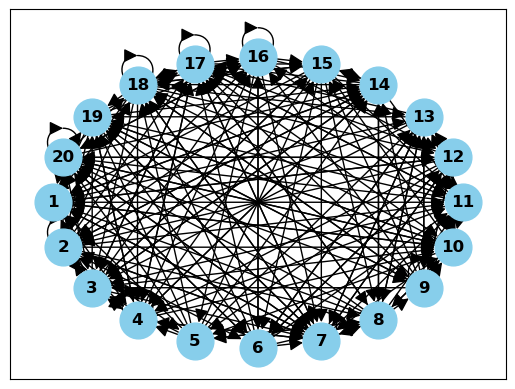

<Figure size 640x480 with 0 Axes>

In [55]:
def visualize_network(matrix):
    G = nx.DiGraph()

    # Add nodes to the graph
    num_nodes = matrix.shape[0]
    G.add_nodes_from(range(1, num_nodes + 1))

    # Add directed edges based on the matrix
    for i in range(num_nodes):
        for j in range(num_nodes):
            if matrix[i, j] == 1:
                G.add_edge(i + 1, j + 1)
                

    # Draw the graph using shell layout
    pos = nx.shell_layout(G)
    nx.draw_networkx(G, pos=pos, with_labels=True, font_weight='bold', node_size=700, node_color="skyblue", arrowsize=20)

    # Create a new figure explicitly
    plt.figure()

    # Display the plot
    plt.show()

# Example matrix A
matrix_A = np.array([[0, 1, 0, 1],
                    [1, 0, 1, 0],
                    [1, 0, 0, 1],
                    [0, 1, 1, 1]])

# Visualize the network
visualize_network(ex)

### Distribución estacionaria

En el siguiente bloque calculamos la distribución estacionaria

In [6]:
transition_matrix = m_trans(ex)

In [7]:
dim = ex.shape[0]
i_d = np.ones((1,dim))/dim

IndexError: index 1 is out of bounds for axis 1 with size 1

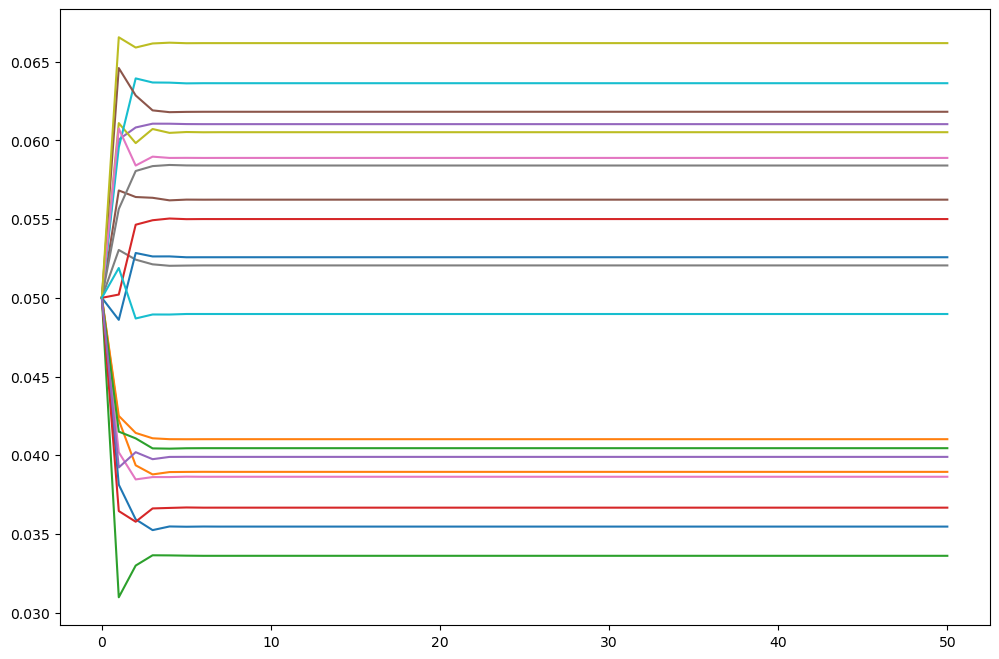

In [8]:
#Consideramos la siguiente matriz de transición entre nuestros estados:

#Damos una distribución inicial. Con ella buscaremos encontrar la distribución estacionaria.
initial_distribution = i_d

# Listas para guardar la evolución de la distribución y la iteración
distributions = [initial_distribution]
iterations = 50

# Multiplicamos distribución por matriz de transición y repetimenos el proceso "iterations" veces
for i in range(iterations):
    new_distribution = np.dot(distributions[-1], transition_matrix)
    distributions.append(new_distribution)

# Convertir a un array de NumPy para facilitar el acceso
distributions = np.array(distributions)

# Visualizamos
plt.figure(figsize=(12, 8))



#Para las 50+1 simulaciones, graficamos la distribución de cada una de las entradas de la distribución.
for i in range(dim):
    plt.plot(range(iterations + 1), distributions[:, i], label=f"Estado {i+1}")

plt.title("Convergencia a la Distribución Estacionaria")
plt.xlabel("Iteraciones")
plt.ylabel("Probabilidad")
plt.legend()
plt.grid(True)
plt.show()

## Análisis de la base de datos

In [22]:
import pickle

In [23]:
with open("datos_save.pk1", "rb") as f:
    diccio = pickle.load(f)

In [34]:
print(len(diccio))

629814


In [37]:
np.zeros((600000,600000))

MemoryError: Unable to allocate 2.62 TiB for an array with shape (600000, 600000) and data type float64

In [38]:
from scipy.sparse import *
from scipy import *

In [41]:
a=csr_matrix( (600000,600000), dtype=int)